# Data Exploration Analysis

In [ ]:
import imageio
#from pprint import pprint
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

## Load data

In [2]:
data = pd.read_json(path_or_buf='../data/processed/train.json')

## Split data into dataset with independent variables (`x`) and dependent variable (`y`)

In [3]:
X = data[["band_1", "band_2", "inc_angle"]] 
y = data["is_iceberg"]

## Split the data into `train` and `test` with `test_size` = 0.2

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print(X_train.shape)
print(X_test.shape)

(1283, 3)
(321, 3)


In [6]:
class image_manipulation():
    def __init__(self, data, result):
        self.data = data
        self.result = result
    
    # visual display of an 2D numpy array
    def show_image(image, cmap=None, title=None):
        fig = figure(figsize=(25, 25))
        vmax = 255
        plt.figure(figsize=(5, 5))
        plt.imshow(image, cmap=cmap, vmin=0, vmax=vmax)
        plt.axis('off')
        plt.show()
        
    def show_image_horizontally(self, list_image, list_title, cmap=None):
        list_len = len(list_image)
        fig = figure(figsize=(3*list_len, 3*list_len))
        n_image = len(list_image)
        for i in range(n_image):
            a=fig.add_subplot(1,n_image,i+1)
            plt.title(list_title[i], fontsize=14)
            image = list_image[i]
            imshow(image,cmap=cmap, vmin=0, vmax=255)
            axis('off')
        
    def show_example(self, index=0, cmap=None):
        scaler = MinMaxScaler(feature_range=(0, 255))
        example = self.data.iloc[index]
        example_result = self.result.iloc[index]
        id = "N/A" #example["id"]
        inc_angle = example["inc_angle"]
        is_iceberg = str(example_result)
        list_images = []
        list_image_titles = []
        for band in ["band_1", "band_2"]:
            example_band = np.array(example[band]).reshape(75,75)
            scaler.fit(example_band)
            example_image = scaler.transform(example_band)
            list_images.append(example_image)
            list_image_titles.append(band)

        mean_example_image =  sum(list_images)/2
        list_images.append(mean_example_image)
        list_image_titles.append("mean")
        self.show_image_horizontally(list_image=list_images, list_title=list_image_titles, cmap=cmap)
        print("Index: %s, example id: %s, incidence angle: %s, is iceberg: %s" % (index, id, inc_angle, is_iceberg))

## Visualize image - `band_1`, `band_2` and `mean`

Index: 0, example id: N/A, incidence angle: 41.8817, is iceberg: 1


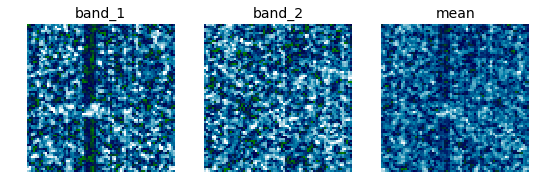

In [7]:
im = image_manipulation(data=X_train, result=y_train)
im.show_example(index=0, cmap="ocean")

### Show ratio of "is_iceberg" on train data

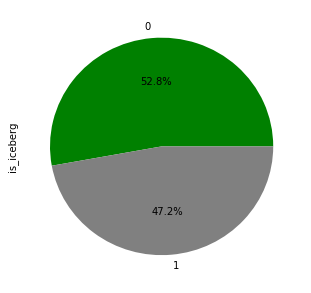

In [8]:
df_is_iceberg = pd.DataFrame(y_train).groupby("is_iceberg")["is_iceberg"].count()
df_is_iceberg.plot.pie(figsize=(5,5), autopct='%1.1f%%', colors=["green", "grey"])
plt.show()